# Лабораторная работа 2
## «Исследовательский анализ данных. Проверка статистических гипотез»

**Постановка задачи**: Заказчик – кредитный отдел банка, входные данные от банка — статистика о платёжеспособности клиентов. Требуется построить модель кредитного скоринга, которая позволит оценить способность потенциального заёмщика вернуть кредит банку.

**Описание данных**

* children – количество детей в семье;
* days_employed – общий трудовой стаж в днях;
* dob_years – возраст клиента в годах;
* education – уровень образования клиента;
* education_id – идентификатор уровня образования;
* family_status – семейное положение;
* family_status_id – идентификатор семейного положения;
* gender – пол клиента;
* income_type – тип занятости;
* debt – имел ли задолженность по возврату кредитов (1 – имел, 0 – не имел);
* total_income – ежемесячный доход;
* purpose – цель получения кредита.

**Задание**

1.	По результатам предобработки данных (лаб. 1) ответьте на вопросы:

      * Есть ли зависимость между наличием детей и возвратом кредита в срок?
    
      * Есть ли зависимость между семейным положением и возвратом кредита в срок?

      * Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

      * Как разные цели кредита влияют на его возврат в срок?
    
2.	Проведите корреляционный анализ переменных. Проверьте гипотезы о статистической значимости коэффициентов. Сделайте выводы. 

3.	Постройте гистограммы распределений для переменных:

      * days_employed – общий трудовой стаж в днях;

      * dob_years – возраст клиента в годах;

      * total_income – ежемесячный доход.

4.	Проверьте гипотезы о нормальном законе распределения случайных величин:

      * days_employed – общий трудовой стаж в днях;

      * dob_years – возраст клиента в годах;

      * total_income – ежемесячный доход.

      Используйте тест Шапиро-Уилка, критерий Пирсона, тест Андерсона-Дарлинга. Сделайте выводы.
     
5.	Выполните п.3-4 для двух выборок: клиенты, имеющие задолженность по кредиту; клиенты, не имеющие задолженность по кредитам. Сделайте выводы.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from scipy.stats import shapiro, pearsonr, anderson, norm, ttest_1samp, mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("./data/data_correct.csv", index_col=0)
dataset.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,family_status_factorize,total_income_categorical,total_income_categorical_factorize,purpose_factorize,dob_years_categorical,days_employed_categorical
0,1,0.770564,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,жильё,0,75-100%,0,0,50-75%,75-100%
1,1,0.367562,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,автомобиль,0,25-50%,1,1,25-50%,50-75%
2,0,0.513555,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,жильё,0,50-75%,2,0,25-50%,75-100%
3,3,0.376689,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,образование,0,75-100%,0,2,0-25%,50-75%
4,0,31.074527,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,свадьба,1,50-75%,2,3,75-100%,75-100%


In [3]:
dataset_debt_0 = dataset[dataset["debt"] == 0]
dataset_debt_1 = dataset[dataset["debt"] == 1]

# dataset_debt_0["children"] = dataset_debt_0["children"].transform(lambda x: 0 if x == 0 else 1)
# dataset_debt_1["children"] = dataset_debt_1["children"].transform(lambda x: 0 if x == 0 else 1)

## 2. Проведите корреляционный анализ переменных. Проверьте гипотезы о статистической значимости коэффициентов. Сделайте выводы

[Text(0.5, 1.0, 'Корреляционная матрица')]

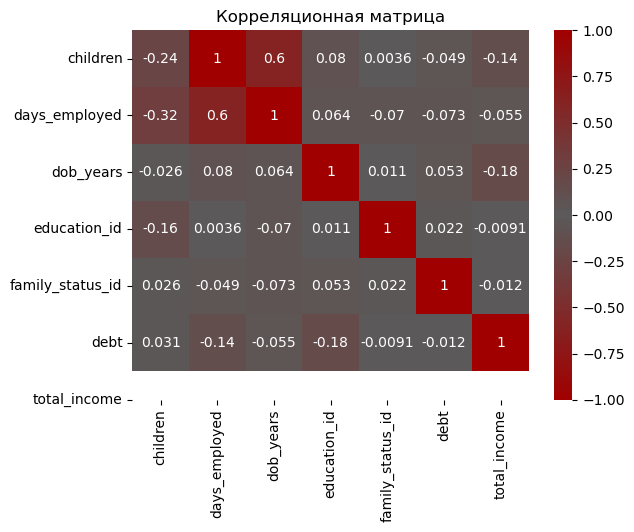

In [4]:
corr = dataset.corr().iloc[1: -3].drop(['family_status_factorize', 'total_income_categorical_factorize', 'purpose_factorize'], axis=1)

colors = [
    (160/255, 0/255, 0/255),
    (90/255, 90/255, 90/255),
    (160/255, 0/255, 0/255)
]

plot = sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    cmap=LinearSegmentedColormap.from_list("MyPallet", colors, N=100),
    annot=True,
    vmin=-1,
    vmax=1
)
plot.set(title="Корреляционная матрица")

In [5]:
a = 0.05
print(f"Хи-квадрат Пирсона:\nchildren и days_employed\n{'H₀ отвергается => коэффициент статистически не значим' if pearsonr(dataset['children'], dataset['days_employed'])[1] < a else 'H₀ принимается => коэффициент статистически значим'}")

Хи-квадрат Пирсона:
children и days_employed
H₀ отвергается => коэффициент статистически не значим


In [6]:
print(f"Хи-квадрат Пирсона:\nchildren и dob_years\n{'H₀ отвергается => коэффициент статистически не значим' if pearsonr(dataset['children'], dataset['dob_years'])[1] < a else 'H₀ принимается => коэффициент статистически значим'}")

Хи-квадрат Пирсона:
children и dob_years
H₀ отвергается => коэффициент статистически не значим


In [7]:
print(f"Хи-квадрат Пирсона:\ndays_employed и dob_years\n{'H₀ отвергается => коэффициент статистически не значим' if pearsonr(dataset['days_employed'], dataset['dob_years'])[1] < a else 'H₀ принимается => коэффициент статистически значим'}")

Хи-квадрат Пирсона:
days_employed и dob_years
H₀ отвергается => коэффициент статистически не значим


## 3. Постройте гистограммы распределений для переменных:

* **days_employed – общий трудовой стаж в днях;**

* **dob_years – возраст клиента в годах;**

* **total_income – ежемесячный доход.**

## 4. Проверьте гипотезы о нормальном законе распределения случайных величин.

## 5. Выполните п.3-4 для двух выборок: клиенты, имеющие задолженность по кредиту; клиенты, не имеющие задолженность по кредитам. Сделайте выводы.

### days_employed

**Проверим гипотезу о нормальном законе распределения случайной величины X (общий трудовой стаж в днях):**

$$H_0: X \sim N(a, \sigma^2)$$

$$H_1: X \not\sim N(a, \sigma^2)$$

In [8]:
def stat_report(column, a=0.05):
    print(f"Проверка нормальности для всей выборки: {'H₀ отвергается => закон отличен от нормального' if shapiro(dataset[column])[1] < a else 'H₀ принимается => закон приближен к нормальному'}")
    print(f"Проверка нормальности для debt = 0: {'H₀ отвергается => закон отличен от нормального' if shapiro(dataset_debt_0[column])[1] < a else 'H₀ принимается => закон приближен к нормальному'}")
    print(f"Проверка нормальности для debt = 1: {'H₀ отвергается => закон отличен от нормального' if shapiro(dataset_debt_1[column])[1] < a else 'H₀ принимается => закон приближен к нормальному'}")
    print(f"t-тест для проверки равенства генеральной средней выбранному значению : {'H₀ отвергается => генеральные средние не равны' if ttest_1samp(dataset_debt_0[column], dataset_debt_1[column].mean(), alternative='two-sided')[1] < a else 'H₀ принимается => генеральные средние равны'}")
    print(f"Непараметрический тест Уилкоксона-Манна-Уитни: {'H₀ отвергается => закон отличен от нормального' if mannwhitneyu(dataset_debt_0[column], dataset_debt_1[column])[1] < a else 'H₀ принимается => закон приближен к нормальному'}")
    print(f"Тест Андерсона-Дарлинга: {'H₀ отвергается => закон отличен от нормального' if anderson(dataset[column]).critical_values[2] < anderson(dataset[column]).statistic else 'H₀ принимается => закон приближен к нормальному'}")

In [9]:
stat_report('days_employed')

Проверка нормальности для всей выборки: H₀ отвергается => закон отличен от нормального
Проверка нормальности для debt = 0: H₀ отвергается => закон отличен от нормального
Проверка нормальности для debt = 1: H₀ отвергается => закон отличен от нормального
t-тест для проверки равенства генеральной средней выбранному значению : H₀ отвергается => генеральные средние не равны
Непараметрический тест Уилкоксона-Манна-Уитни: H₀ отвергается => закон отличен от нормального
Тест Андерсона-Дарлинга: H₀ отвергается => закон отличен от нормального


**Распределение days_employed (общий трудовой стаж в днях) по всему датасету**

In [10]:
def get_norm_rasp(data, bins=10):
    X = data
    bins_hist = bins
    xmin = X.min()
    xmax = X.max()
    nx = 100
    x1 = np.linspace(xmin, xmax, nx)
    xnorm1 = norm.pdf(x1, X.mean(), X.std())
    kx = len(np.histogram(X, bins=bins_hist, density=False)[0])
    xnorm2 = xnorm1*len(X)*(xmax-xmin)/kx

    plt.hist(
        X,
        bins=bins_hist,
        density=False,
        histtype='bar',
        orientation='vertical',
        color="#1f77b4",
        label='эмпирическая частота')
    plt.plot(
        x1, xnorm2,
        linestyle="-",
        color="r",
        linewidth=2,
        label='теоретическая нормальная кривая')
    plt.axvline(X.mean(), color='magenta', label = 'среднее значение')
    plt.axvline(X.median(), color='orange', label = 'медиана')

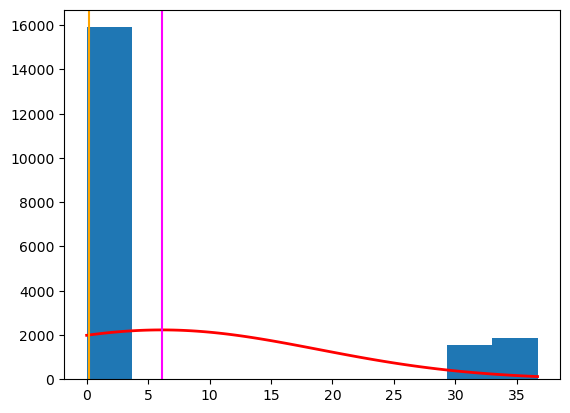

In [11]:
get_norm_rasp(dataset['days_employed'])

**Выделение двух больших частей**

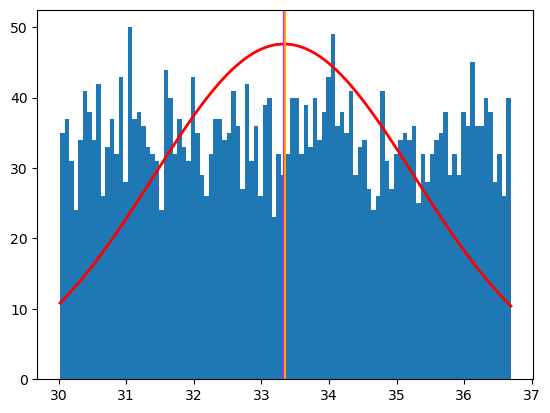

In [12]:
get_norm_rasp(dataset[dataset['days_employed'] > 30]['days_employed'], 100)

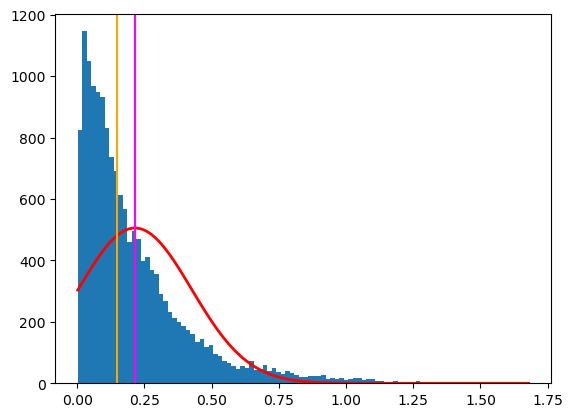

In [13]:
get_norm_rasp(dataset[dataset['days_employed'] < 2]['days_employed'], bins=100)

**Распределения для debt=0**

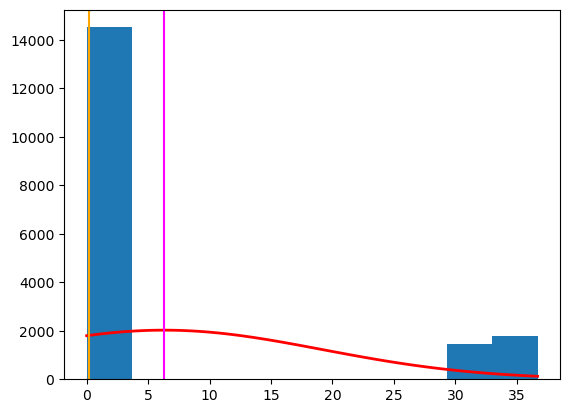

In [14]:
get_norm_rasp(dataset_debt_0['days_employed'])

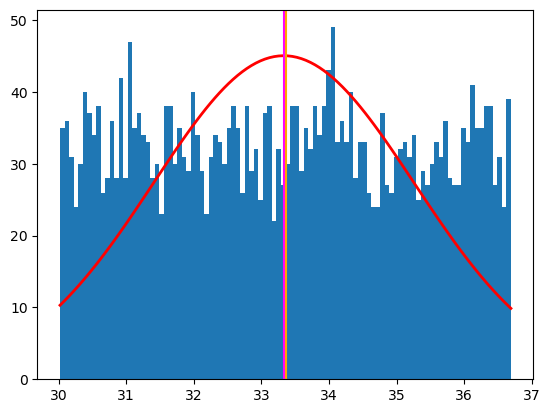

In [15]:
get_norm_rasp(dataset_debt_0[dataset_debt_0['days_employed'] > 30]['days_employed'], bins=100)

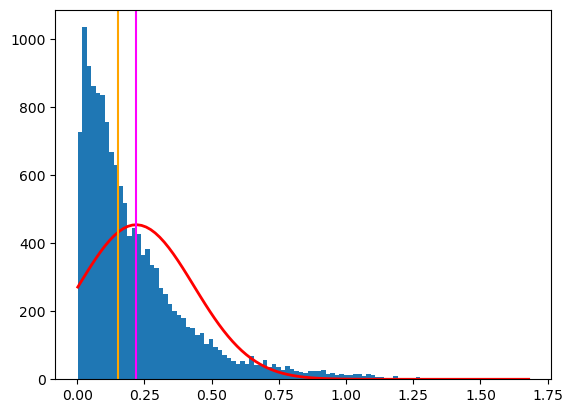

In [16]:
get_norm_rasp(dataset_debt_0[dataset_debt_0['days_employed'] < 2]['days_employed'], bins=100)

**Распределение для debt=1**

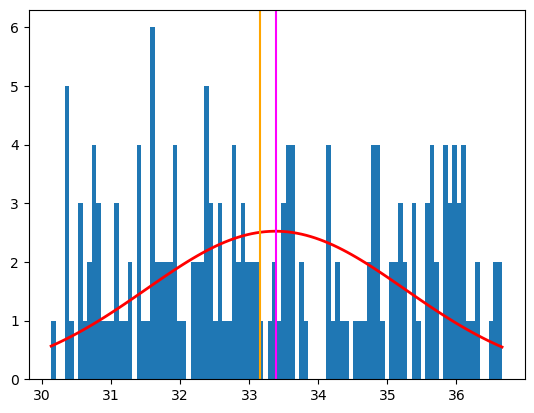

In [17]:
get_norm_rasp(dataset_debt_1[dataset_debt_1['days_employed'] > 30]['days_employed'], bins=100)

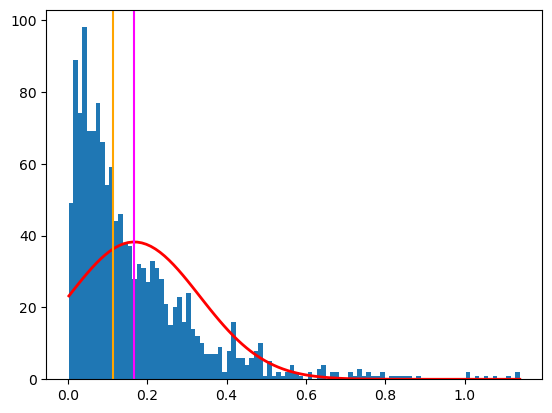

In [18]:
get_norm_rasp(dataset_debt_1[dataset_debt_1['days_employed'] < 2]['days_employed'], bins=100)

### dob_years

**Проверим гипотезу о нормальном законе распределения случайной величины X (возраст клиента в годах):**

$$H_0: X \sim N(a, \sigma^2)$$

$$H_1: X \not\sim N(a, \sigma^2)$$

In [19]:
stat_report('dob_years')

Проверка нормальности для всей выборки: H₀ отвергается => закон отличен от нормального
Проверка нормальности для debt = 0: H₀ отвергается => закон отличен от нормального
Проверка нормальности для debt = 1: H₀ отвергается => закон отличен от нормального
t-тест для проверки равенства генеральной средней выбранному значению : H₀ отвергается => генеральные средние не равны
Непараметрический тест Уилкоксона-Манна-Уитни: H₀ отвергается => закон отличен от нормального
Тест Андерсона-Дарлинга: H₀ отвергается => закон отличен от нормального


**Распределение dob_years (возраст клиента в годах) по всему датасету**

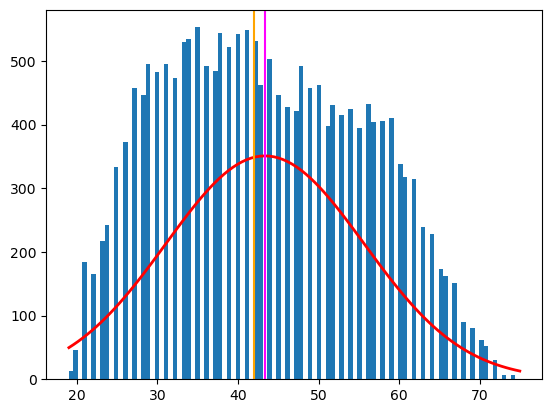

In [20]:
get_norm_rasp(dataset['dob_years'], bins=100)

Проверка нормальности для всей выборки: H0 отвергается => закон отличен от нормального


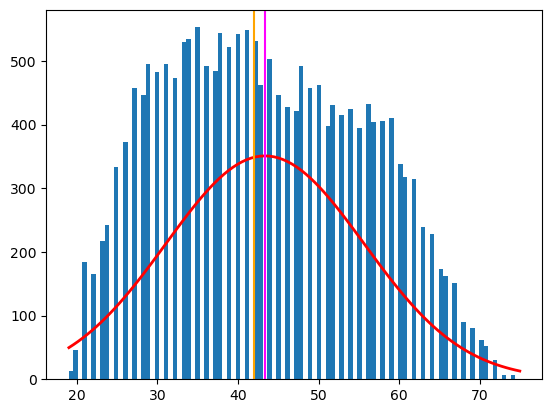

In [21]:
dataset_norm_dob_years = dataset[dataset['dob_years'] > 15]['dob_years']
get_norm_rasp(dataset_norm_dob_years, bins=100)
print(f"Проверка нормальности для всей выборки: {'H0 отвергается => закон отличен от нормального' if shapiro(dataset_norm_dob_years)[1] < a else 'H0 принимается => закон приближен к нормальному'}")

**Распределения для debt=0**

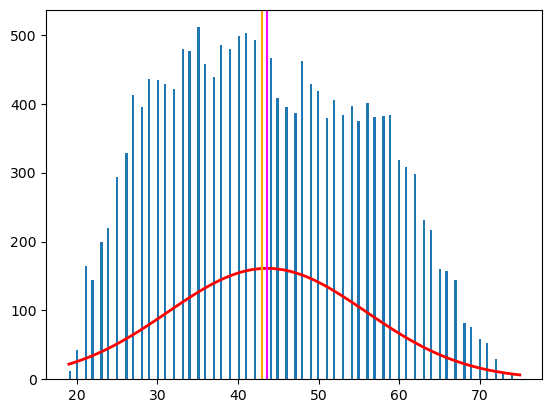

In [22]:
dataset_debt_0_norm_dob_years = dataset_debt_0[dataset_debt_0['dob_years'] > 15]['dob_years']
get_norm_rasp(dataset_debt_0_norm_dob_years, bins=200)

**Распределения для debt=1**

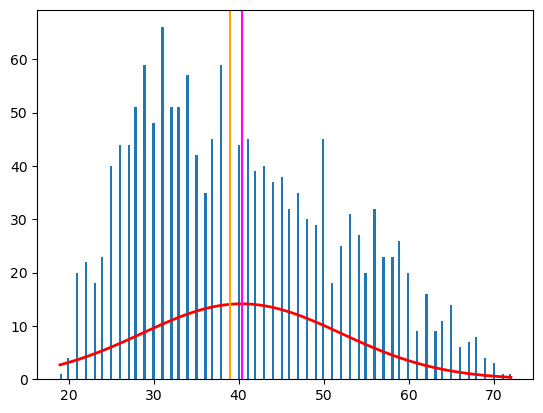

In [23]:
dataset_debt_1_norm_dob_years = dataset_debt_1[dataset_debt_1['dob_years'] > 15]['dob_years']
get_norm_rasp(dataset_debt_1_norm_dob_years, bins=200)

In [24]:
print(f"Непараметрический тест Уилкоксона-Манна-Уитни: {'H0 отвергается => закон отличен от нормального' if mannwhitneyu(dataset_debt_0_norm_dob_years, dataset_debt_1_norm_dob_years)[1] < a else 'H0 принимается => закон приближен к нормальному'}")

Непараметрический тест Уилкоксона-Манна-Уитни: H0 отвергается => закон отличен от нормального


### total_income

**Проверим гипотезу о нормальном законе распределения случайной величины X (ежемесячный доход):**

$$H_0: X \sim N(a, \sigma^2)$$

$$H_1: X \not\sim N(a, \sigma^2)$$

In [25]:
stat_report('total_income')

Проверка нормальности для всей выборки: H₀ отвергается => закон отличен от нормального
Проверка нормальности для debt = 0: H₀ отвергается => закон отличен от нормального
Проверка нормальности для debt = 1: H₀ отвергается => закон отличен от нормального
t-тест для проверки равенства генеральной средней выбранному значению : H₀ отвергается => генеральные средние не равны
Непараметрический тест Уилкоксона-Манна-Уитни: H₀ принимается => закон приближен к нормальному
Тест Андерсона-Дарлинга: H₀ отвергается => закон отличен от нормального


**Распределение total_income (ежемесячный доход) по всему датасету**

Проверка нормальности для всей выборки: H0 отвергается => закон отличен от нормального


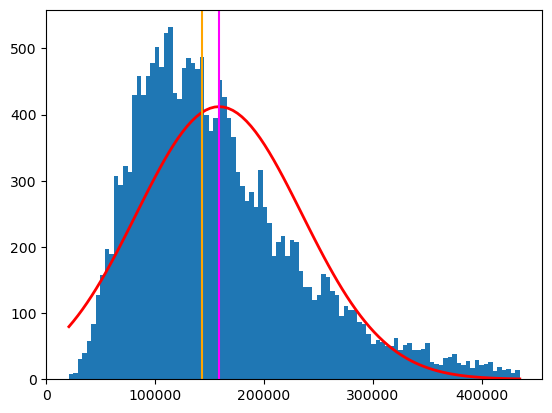

In [26]:
dataset_norm_total_income = dataset[dataset["total_income"] < dataset["total_income"].quantile(0.98)]["total_income"]
get_norm_rasp(dataset_norm_total_income, bins=100)
print(f"Проверка нормальности для всей выборки: {'H0 отвергается => закон отличен от нормального' if shapiro(dataset_norm_total_income)[1] < a else 'H0 принимается => закон приближен к нормальному'}")

**Распределения для debt=0**

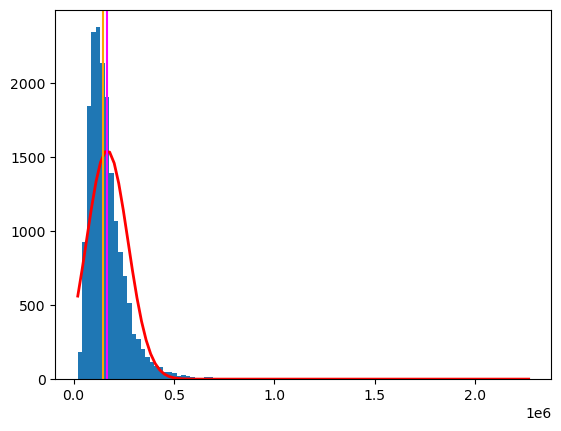

In [27]:
get_norm_rasp(dataset_debt_0["total_income"], bins=100)

**Распределения для debt=1**

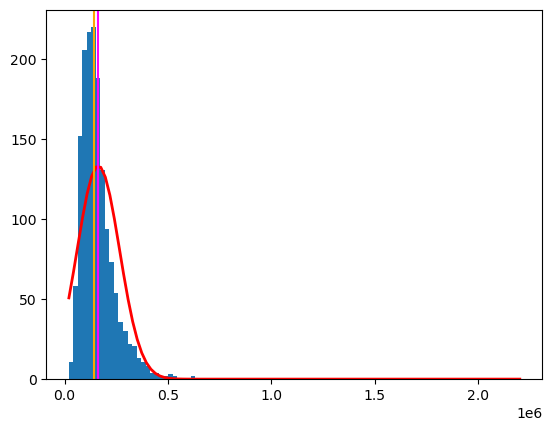

In [28]:
get_norm_rasp(dataset_debt_1["total_income"], bins=100)